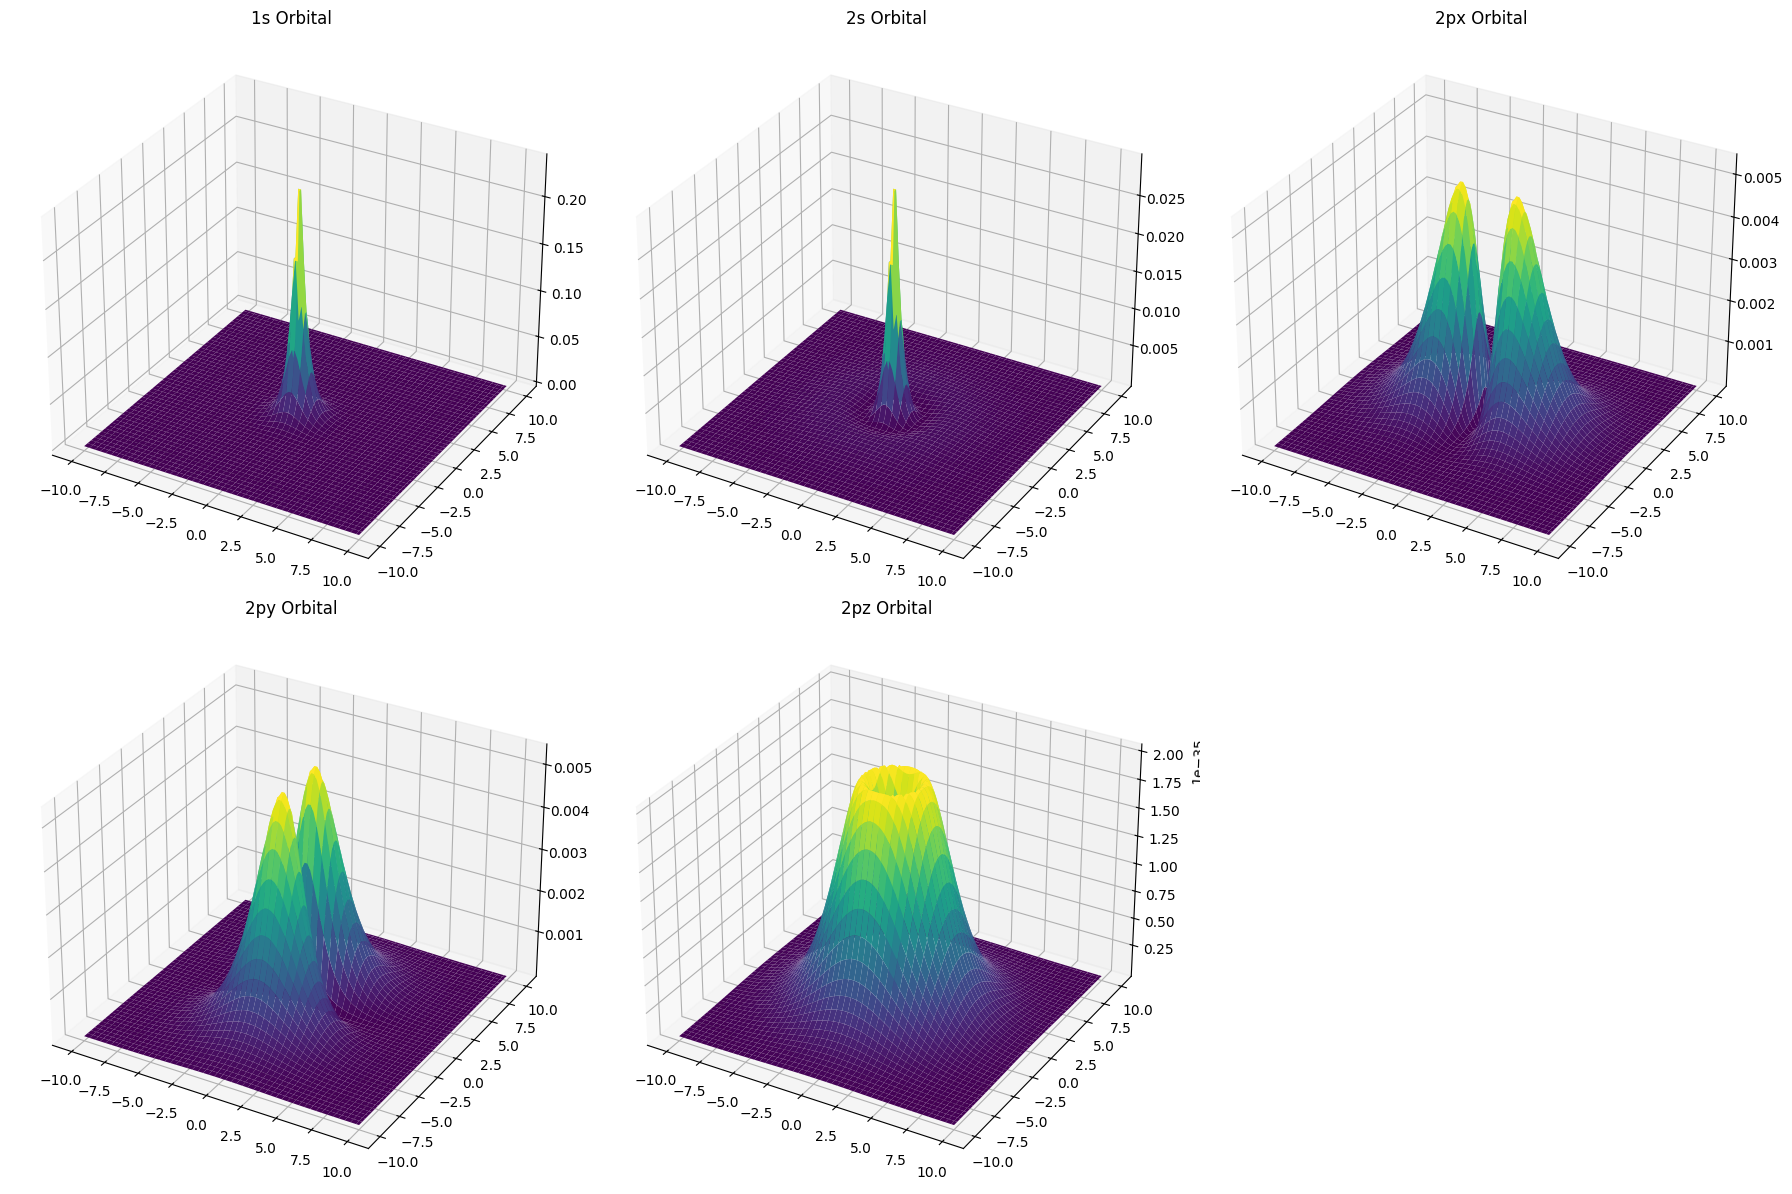

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
a0_real = 1  # Bohr radius in meters

# Radial part functions with normalization factors
def R_1s_real(r):
    return 2 * (1/a0_real)**(3/2) * np.exp(-r / a0_real)

def R_2s_real(r):
    return (1/(2*np.sqrt(2))) * (1/a0_real)**(3/2) * (2 - r / a0_real) * np.exp(-r / (2 * a0_real))

def R_2p_real(r):
    return (1/(2*np.sqrt(6))) * (1/a0_real)**(3/2) * (r / a0_real) * np.exp(-r / (2 * a0_real))

# Spherical harmonics functions
def Y_1s(theta, phi):
    return np.sqrt(1 / (4 * np.pi))

def Y_2s(theta, phi):
    return np.sqrt(1 / (4 * np.pi))

def Y_2px(theta, phi):
    return np.sqrt(3 / (4 * np.pi)) * np.sin(theta) * np.cos(phi)

def Y_2py(theta, phi):
    return np.sqrt(3 / (4 * np.pi)) * np.sin(theta) * np.sin(phi)

def Y_2pz(theta, phi):
    return np.sqrt(3 / (4 * np.pi)) * np.cos(theta)

# Setting up the 3D grid
x_real = np.linspace(-10 * a0_real, 10 * a0_real, 100)
y_real = np.linspace(-10 * a0_real, 10 * a0_real, 100)
X_real, Y_real = np.meshgrid(x_real, y_real)
Z_real = np.zeros_like(X_real)

r_real = np.sqrt(X_real**2 + Y_real**2)
theta_real = np.arctan2(np.sqrt(X_real**2 + Y_real**2), Z_real)
phi_real = np.arctan2(Y_real, X_real)

# Plotting
fig_real, axs_real = plt.subplots(2, 3, subplot_kw={'projection': '3d'}, figsize=(18, 12))
axs_real = axs_real.ravel()

# 1s Orbital
psi_val_real = np.abs(R_1s_real(r_real) * Y_1s(theta_real, phi_real))**2
axs_real[0].plot_surface(X_real, Y_real, psi_val_real, cmap='viridis')
axs_real[0].set_title('1s Orbital')

# 2s Orbital
psi_val_real = np.abs(R_2s_real(r_real) * Y_2s(theta_real, phi_real))**2
axs_real[1].plot_surface(X_real, Y_real, psi_val_real, cmap='viridis')
axs_real[1].set_title('2s Orbital')

# 2px Orbital
psi_val_real = np.abs(R_2p_real(r_real) * Y_2px(theta_real, phi_real))**2
axs_real[2].plot_surface(X_real, Y_real, psi_val_real, cmap='viridis')
axs_real[2].set_title('2px Orbital')

# 2py Orbital
psi_val_real = np.abs(R_2p_real(r_real) * Y_2py(theta_real, phi_real))**2
axs_real[3].plot_surface(X_real, Y_real, psi_val_real, cmap='viridis')
axs_real[3].set_title('2py Orbital')

# 2pz Orbital
psi_val_real = np.abs(R_2p_real(r_real) * Y_2pz(theta_real, phi_real))**2
axs_real[4].plot_surface(X_real, Y_real, psi_val_real, cmap='viridis')
axs_real[4].set_title('2pz Orbital')

# Hide the 6th subplot (extra)
axs_real[5].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [5]:
import numpy as np
from scipy.integrate import quad

# Constants
a0 = 1  # Using Bohr radius as unit length for simplicity and better numerical stability

# Corrected radial wavefunctions with normalization factors
def R_1s_corrected(r):
    # Radial wavefunction for 1s orbital with normalization
    return (1 / np.sqrt(np.pi * a0**3)) * np.exp(-r / a0)

def R_2s_corrected(r):
    # Radial wavefunction for 2s orbital with normalization
    return (1 / (4 * np.sqrt(2 * np.pi * a0**3))) * (2 - r / a0) * np.exp(-r / (2 * a0))

def R_2p_corrected(r):
    # Radial wavefunction for 2p orbitals with normalization
    return (1 / (4 * np.sqrt(2 * np.pi * a0**3))) * (r / a0) * np.exp(-r / (2 * a0))

# Function to calculate average distance <r> for a given radial wavefunction, corrected for normalization
def average_distance_corrected(R, n, l):
    # Define the integrand for calculating <r>
    def integrand(r):
        return 4 * np.pi * r**2 * (R(r)**2) * r
    # Integrate from 0 to infinity to calculate <r>
    result, _ = quad(integrand, 0, np.inf)
    return result

# Calculate average distances with corrected wavefunctions
avg_distance_1s_corrected = average_distance_corrected(R_1s_corrected, 1, 0)
avg_distance_2s_corrected = average_distance_corrected(R_2s_corrected, 2, 0)
avg_distance_2p_corrected = average_distance_corrected(R_2p_corrected, 2, 1)  # Same for 2px, 2py, 2pz

print(avg_distance_1s_corrected, avg_distance_2s_corrected, avg_distance_2p_corrected)

1.5 6.000000000000001 15.000000000000002
